In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

In [2]:
thresholds = [0.02,0.03,0.04,0.05,0.10,0.15,0.20,0.25,0.30,0.35]
colors = ['orange','b','r','c','y','m','k']
hatches = ['/','*', 'o', 'O', '.','--', '+']

In [3]:
def get_means_stds(string, thresholds):
    means = []
    stds = []
    nan_flags = []
    for thresh in thresholds:
        test_string = "F-score @ threshold {:.2f}".format(thresh)
        line_detection = [test_string in i for i in string]
        try: detection_index = line_detection.index(True)
        except:
            means.append(np.nan)
            stds.append(np.nan)
            continue
        if 'NAN' in string[detection_index]:
            nan_flags.append(True)
        else:
            nan_flags.append(False)
        data_line = string[detection_index+1].split('Mean: ')[-1]
        mean = float(data_line[:5])
        std = float(data_line[-5:])
        means.append(mean)
        stds.append(std)
    return thresholds, means, stds, nan_flags

In [4]:
def plot_lines(title, thresholds, means, stds, nan_flags,color,hatch):
    thresholds, means, stds, nan_flags = np.array(thresholds), np.array(means), np.array(stds), np.array(nan_flags)
    plt.plot(thresholds,means,label=title,color=color)
#     plt.errorbar(thresholds,means, stds,color=color)
#     for ii in range(len(nan_flags)):
#         if nan_flags[ii]:
#             plt.scatter(thresholds[ii],means[ii],s=200,marker='x', color=color)
#     plt.fill_between(thresholds, means-stds,means+stds,alpha=.25,color=color,hatch=hatch)
    plt.xlabel('Threshold')
    plt.ylabel('F-Score')
    

In [5]:
def plot_ista_gt(file, thresholds):
    results_file = open(file,"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
        
    scores = []
    for thresh in thresholds:
        test_string = "Metrics @ threshold {:.2f}:".format(thresh)
        line_detection = [test_string in i for i in list_input]
        try: detection_index = line_detection.index(True)
        except:
            scores.append(np.nan)
            continue
#         if 'NAN' in string[detection_index]:
#             nan_flags.append(True)
#         else:
#             nan_flags.append(False)
        score = list_input[detection_index+1].split('F-measure: ')[-1]
        scores.append(float(score))
    plt.plot(thresholds,scores,label='ISTA',color='k',linestyle='--')


In [6]:
csl_lobby_700_30 = '/home/spencer/research/radar-rgb-bfs/Data/CSL_lobby_700/raw/f_score_30.txt'
csl_lobby_700_50 = '/home/spencer/research/radar-rgb-bfs/Data/CSL_lobby_700/raw/f_score_50.txt'
csl_lobby_side_30 = '/home/spencer/research/radar-rgb-bfs/Data/CSL_lobby_side_0/raw/f_score_30.txt'
csl_lobby_side_50 = '/home/spencer/research/radar-rgb-bfs/Data/CSL_lobby_side_0/raw/f_score_50.txt'
csl_pantry_30 = '/home/spencer/research/radar-rgb-bfs/Data/CSL_pantry/raw/f_score_30.txt'
csl_pantry_50 = '/home/spencer/research/radar-rgb-bfs/Data/CSL_pantry/raw/f_score_50.txt'
csl_pantry12_30 = '/home/spencer/research/radar-rgb-bfs/Data/CSL_pantry/raw/pantry12_f_score_30.txt'
csl_pantry12_50 = '/home/spencer/research/radar-rgb-bfs/Data/CSL_pantry/raw/pantry12_f_score_30.txt'

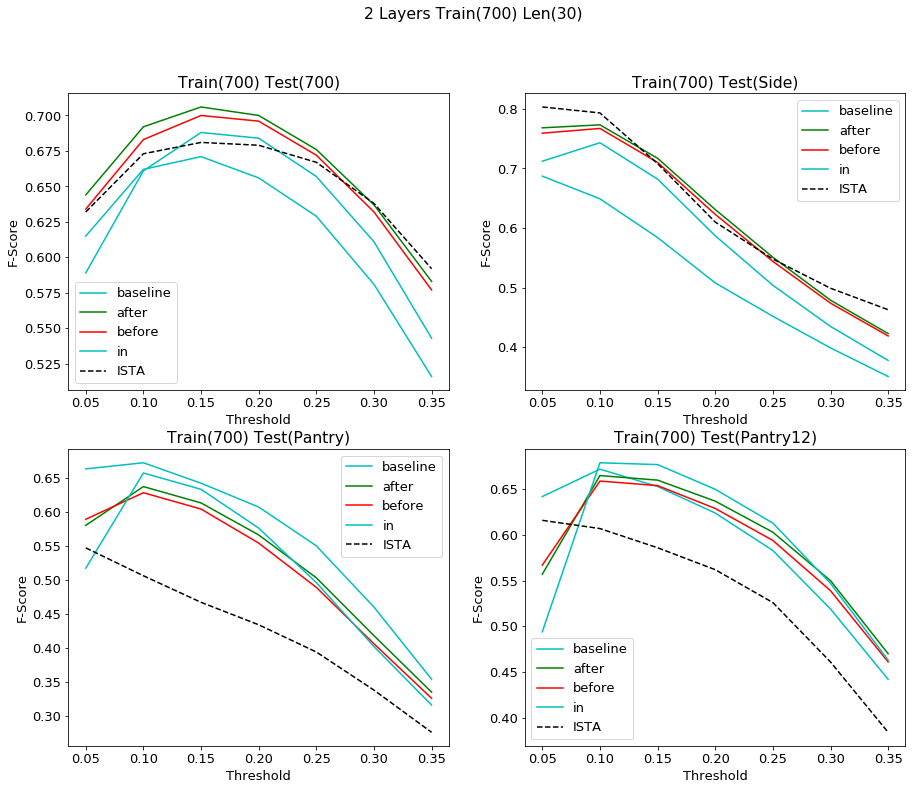

In [43]:
plt.figure(figsize=(15,12))

plt.subplot(221)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_lobby_700/eval/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/after/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/before/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/in/CSL_lobby_700/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_700_30,thresholds)
plt.legend()
plt.title('Train(700) Test(700)')



plt.subplot(222)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_lobby_700/eval/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/after/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/before/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/in/CSL_lobby_side_0/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_side_30,thresholds)
plt.legend()
plt.title('Train(700) Test(Side)')





plt.subplot(223)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_lobby_700/eval/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/after/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/before/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/in/CSL_pantry/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry_30,thresholds)
plt.legend()
plt.title('Train(700) Test(Pantry)')




plt.subplot(224)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_lobby_700/eval/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/after/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/before/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/in/pantry_12/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry12_30,thresholds)
plt.legend()
plt.title('Train(700) Test(Pantry12)')

plt.suptitle('2 Layers Train(700) Len(30)')
plt.show()

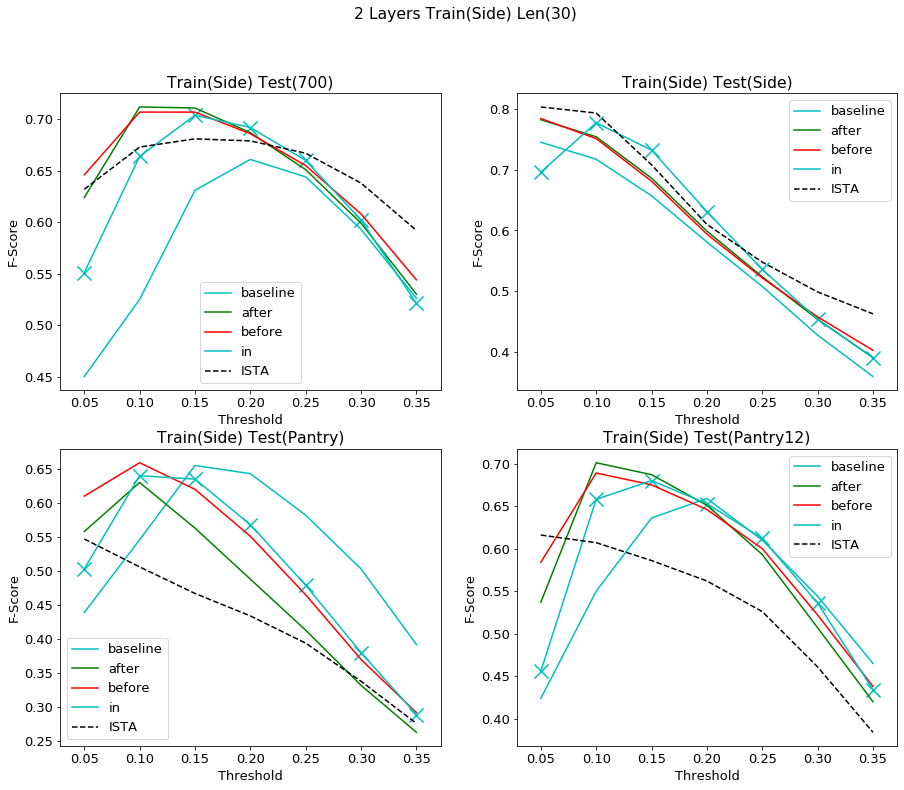

In [44]:
plt.figure(figsize=(15,12))

plt.subplot(221)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_side/eval/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/after/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/before/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/in/CSL_lobby_700/f-score.txt',
                    ]               
results_file_titles = ['baseline','after','before','in','ista']

for ii in range(4):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_700_30,thresholds)
plt.legend()
plt.title('Train(Side) Test(700)')



plt.subplot(222)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_side/eval/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/after/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/before/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/in/CSL_lobby_side_0/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_side_30,thresholds)
plt.legend()
plt.title('Train(Side) Test(Side)')





plt.subplot(223)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_side/eval/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/after/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/before/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/in/CSL_pantry/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry_30,thresholds)
plt.legend()
plt.title('Train(Side) Test(Pantry)')




plt.subplot(224)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_side/eval/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/after/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/before/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/in/pantry_12/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry12_30,thresholds)
plt.legend()
plt.title('Train(Side) Test(Pantry12)')

plt.suptitle('2 Layers Train(Side) Len(30)')
plt.show()

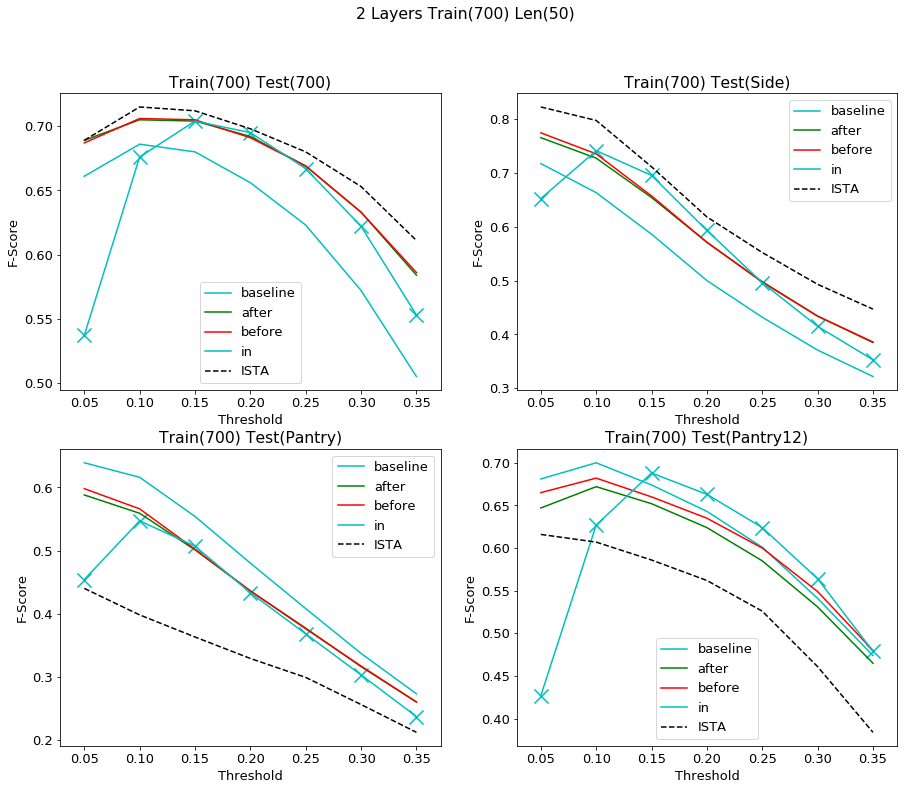

In [45]:
plt.figure(figsize=(15,12))

plt.subplot(221)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len50/train_lobby_700/eval/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/after/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/before/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/in/CSL_lobby_700/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_700_50,thresholds)
plt.legend()
plt.title('Train(700) Test(700)')



plt.subplot(222)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len50/train_lobby_700/eval/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/after/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/before/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/in/CSL_lobby_side_0/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_side_50,thresholds)
plt.legend()
plt.title('Train(700) Test(Side)')





plt.subplot(223)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len50/train_lobby_700/eval/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/after/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/before/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/in/CSL_pantry/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry_50,thresholds)
plt.legend()
plt.title('Train(700) Test(Pantry)')




plt.subplot(224)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len50/train_lobby_700/eval/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/after/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/before/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_lobby_700/eval/in/pantry_12/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry12_50,thresholds)
plt.legend()
plt.title('Train(700) Test(Pantry12)')

plt.suptitle('2 Layers Train(700) Len(50)')
plt.show()

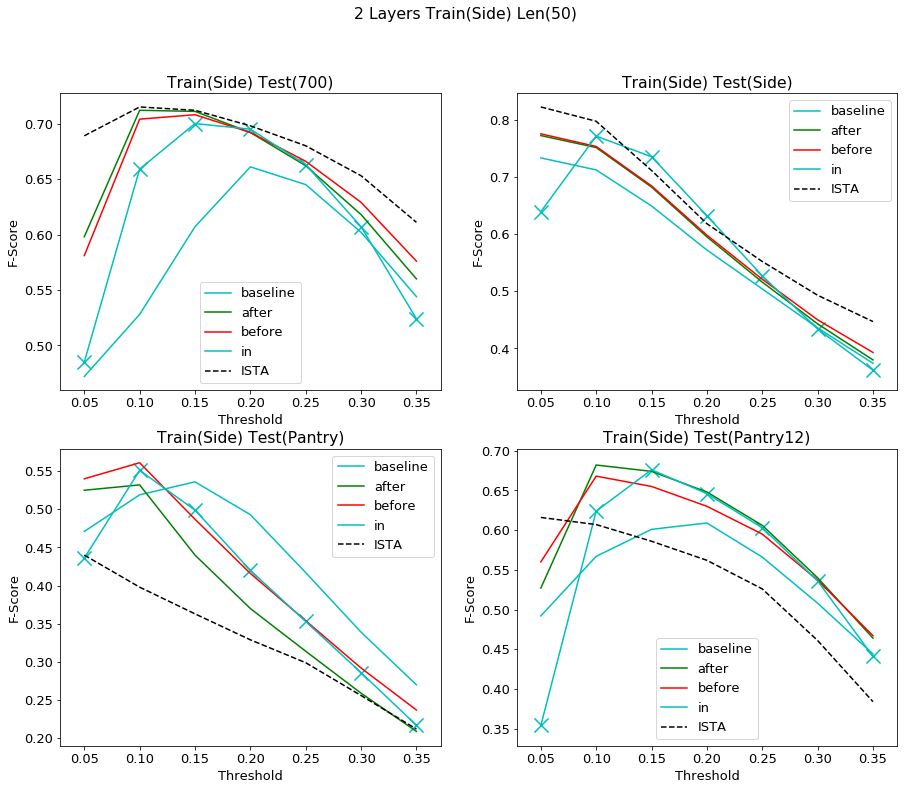

In [46]:
plt.figure(figsize=(15,12))

plt.subplot(221)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len50/train_side/eval/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/after/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/before/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/in/CSL_lobby_700/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_700_50,thresholds)
plt.legend()
plt.title('Train(Side) Test(700)')



plt.subplot(222)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len50/train_side/eval/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/after/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/before/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/in/CSL_lobby_side_0/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_side_50,thresholds)
plt.legend()
plt.title('Train(Side) Test(Side)')





plt.subplot(223)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len50/train_side/eval/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/after/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/before/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/in/CSL_pantry/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry_50,thresholds)
plt.legend()
plt.title('Train(Side) Test(Pantry)')




plt.subplot(224)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len50/train_side/eval/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/after/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/before/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len50/train_side/eval/in/pantry_12/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry12_50,thresholds)
plt.legend()
plt.title('Train(Side) Test(Pantry12)')

plt.suptitle('2 Layers Train(Side) Len(50)')
plt.show()

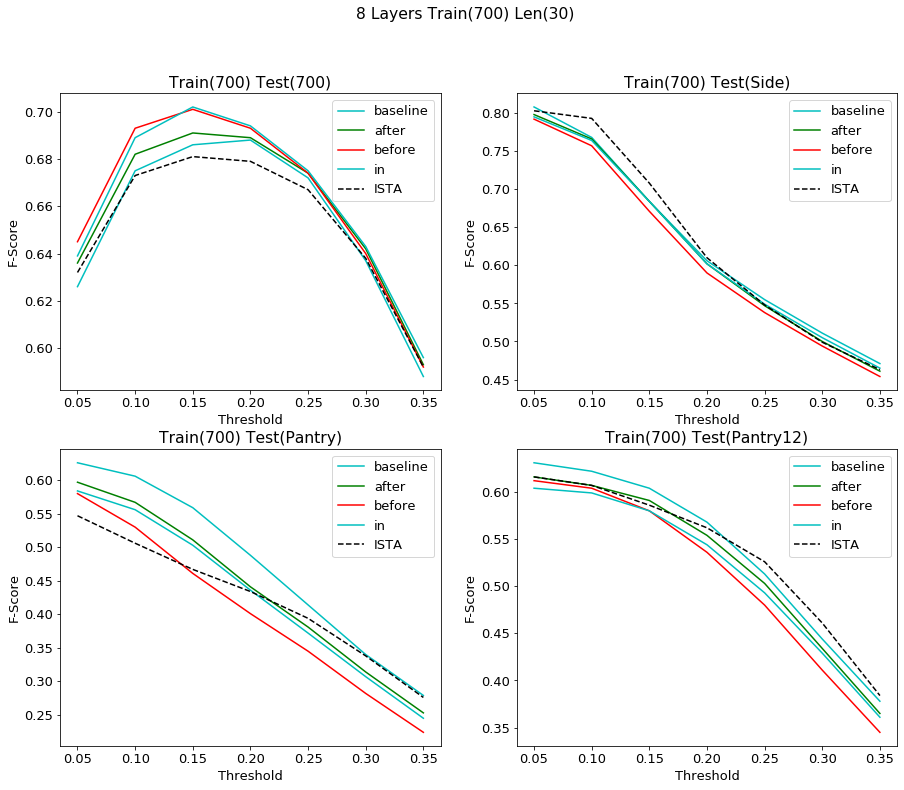

In [47]:
plt.figure(figsize=(15,12))

plt.subplot(221)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_lobby_700/eval/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/after/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/before/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/in/CSL_lobby_700/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_700_30,thresholds)
plt.legend()
plt.title('Train(700) Test(700)')



plt.subplot(222)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_lobby_700/eval/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/after/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/before/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/in/CSL_lobby_side_0/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_side_30,thresholds)
plt.legend()
plt.title('Train(700) Test(Side)')





plt.subplot(223)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_lobby_700/eval/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/after/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/before/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/in/CSL_pantry/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry_30,thresholds)
plt.legend()
plt.title('Train(700) Test(Pantry)')




plt.subplot(224)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_lobby_700/eval/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/after/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/before/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/in/pantry_12/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry12_30,thresholds)
plt.legend()
plt.title('Train(700) Test(Pantry12)')

plt.suptitle('8 Layers Train(700) Len(30)')
plt.show()

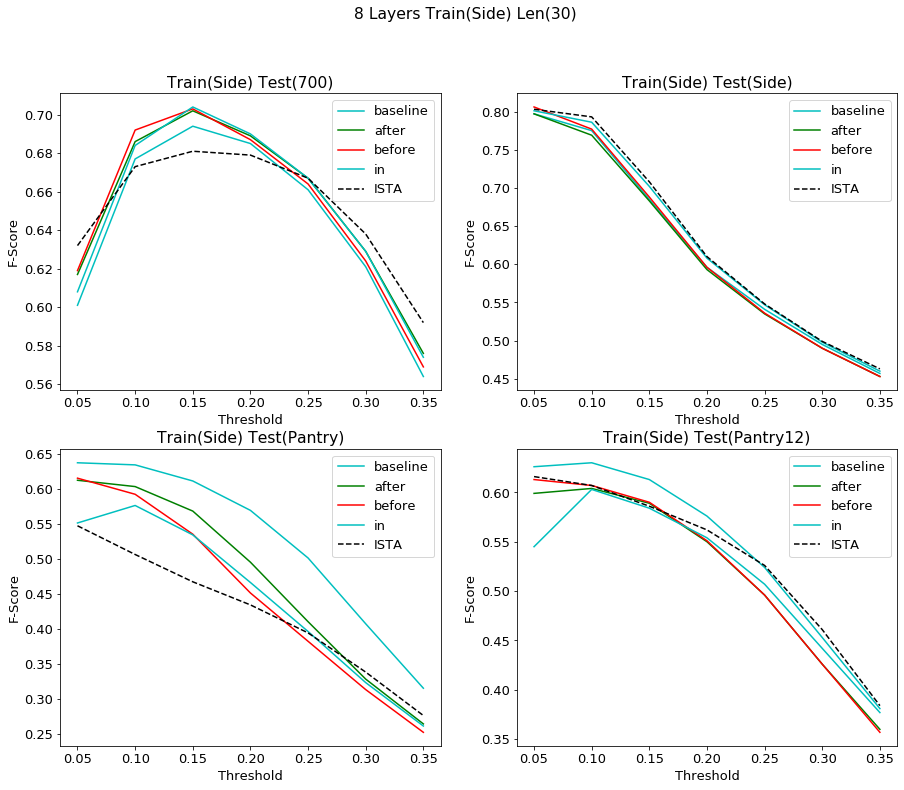

In [48]:
plt.figure(figsize=(15,12))

plt.subplot(221)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_side/eval/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/after/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/before/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/in/CSL_lobby_700/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_700_30,thresholds)
plt.legend()
plt.title('Train(Side) Test(700)')



plt.subplot(222)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_side/eval/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/after/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/before/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/in/CSL_lobby_side_0/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_side_30,thresholds)
plt.legend()
plt.title('Train(Side) Test(Side)')





plt.subplot(223)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_side/eval/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/after/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/before/CSL_pantry/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/in/CSL_pantry/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry_30,thresholds)
plt.legend()
plt.title('Train(Side) Test(Pantry)')




plt.subplot(224)
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_side/eval/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/after/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/before/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/in/pantry_12/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_pantry12_30,thresholds)
plt.legend()
plt.title('Train(Side) Test(Pantry12)')

plt.suptitle('8 Layers Train(Side) Len(30)')
plt.show()

# PAPER 2 Layers Train(Side) Len(30)

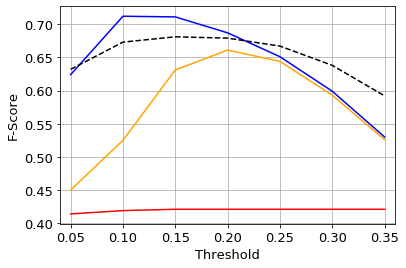

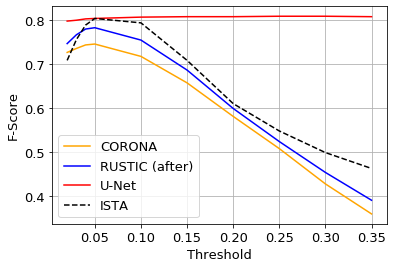

In [8]:
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_side/eval/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/after/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/unet/len30/train_side/eval/CSL_lobby_700_train/f-score.txt'
                    ]               
results_file_titles = ['CORONA','RUSTIC (after)','U-Net']

for ii in range(3):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_700_30,thresholds)
plt.xlim([.04,.36])
# plt.legend()
plt.grid()
plt.savefig('test_seq_f_score_general.png',bbox_inches='tight')



plt.figure()
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_side/eval/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/after/CSL_lobby_side_0/f-score.txt',
                    '/home/spencer/research/radar-rgb-bfs/NN/runs/unet/len30/train_side/eval/CSL_lobby_side_0_train/f-score.txt']               

for ii in range(3):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_side_30,thresholds)
plt.legend()
plt.grid()
plt.savefig('train_seq_f_score_general.png',bbox_inches='tight')
plt.show()

# PAPER 2 Layers Train(700) Len(30)

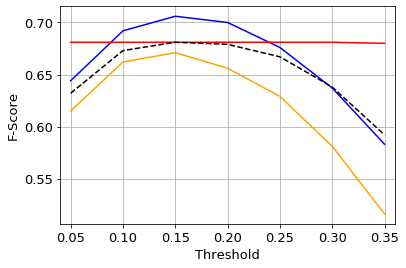

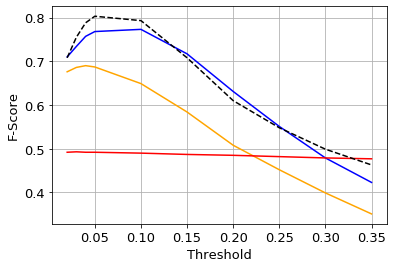

In [7]:
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_lobby_700/eval/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/after/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/unet/len30/train_lobby_700/thresh15/eval/CSL_lobby_700_train/f-score.txt'
                    ]               
results_file_titles = ['No Radar','Radar (after)','U-Net']

for ii in range(3):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_700_30,thresholds)
plt.xlim([.04,.36])
# plt.legend()
plt.grid()
plt.savefig('train_seq_f_score_general_train_700.png',bbox_inches='tight')



plt.figure()
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/baseline/len30/train_lobby_700/eval/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_lobby_700/eval/after/CSL_lobby_side_0/f-score.txt',
                    '/home/spencer/research/radar-rgb-bfs/NN/runs/unet/len30/train_lobby_700/thresh15/eval/CSL_lobby_side_0_train/f-score.txt']               

for ii in range(3):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_side_30,thresholds)
# plt.legend()
plt.grid()
plt.savefig('test_seq_f_score_general_train_700.png',bbox_inches='tight')
plt.show()

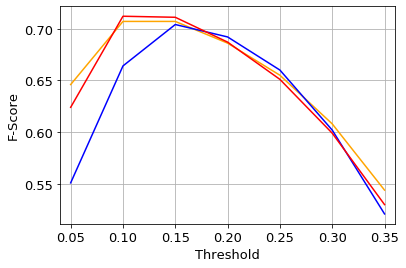

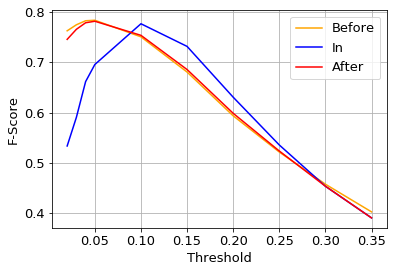

In [70]:
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/before/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/in/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/after/CSL_lobby_700/f-score.txt',
                    ]               
results_file_titles = ['Before','In','After']

for ii in range(3):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
# plot_ista_gt(csl_lobby_700_30,thresholds)
# plt.legend()
plt.xlim([.04,.36])
plt.grid()
plt.savefig('test_seq_f_score_radar.png',bbox_inches='tight')



plt.figure()
results_file_list = [ '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/before/CSL_lobby_side_0/f-score.txt',
                    '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/in/CSL_lobby_side_0/f-score.txt',
                    '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/after/CSL_lobby_side_0/f-score.txt',
]               

for ii in range(3):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plt.legend()
plt.grid()
plt.savefig('train_seq_f_score_radar.png',bbox_inches='tight')
plt.show()

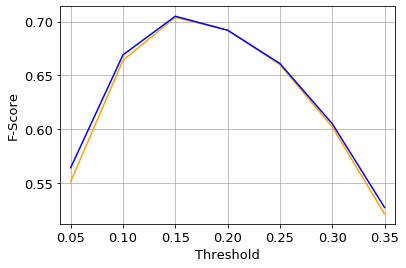

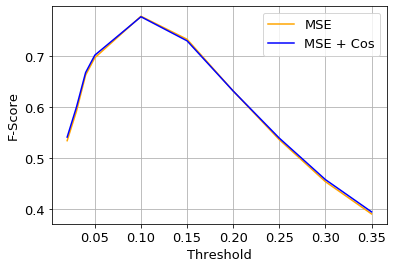

In [71]:
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/in/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/cosine_loss/eval/in/CSL_lobby_700/f-score.txt',
                    ]               
results_file_titles = ['MSE','MSE + Cos']

for ii in range(2):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
# plot_ista_gt(csl_lobby_700_30,thresholds)
# plt.legend()
plt.grid()
plt.xlim([.04,.36])
plt.savefig('test_seq_f_score_cos.png',bbox_inches='tight')



plt.figure()
results_file_list = [ '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/eval/in/CSL_lobby_side_0/f-score.txt',
                    '/home/spencer/research/radar-rgb-bfs/NN/runs/2_layers/radar/len30/train_side/cosine_loss/eval/in/CSL_lobby_side_0/f-score.txt',
]               

for ii in range(2):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plt.legend()
plt.grid()
plt.savefig('train_seq_f_score_cos.png',bbox_inches='tight')
plt.show()

# PAPER (appendix) 8 Layers Train(Side) Len(30)

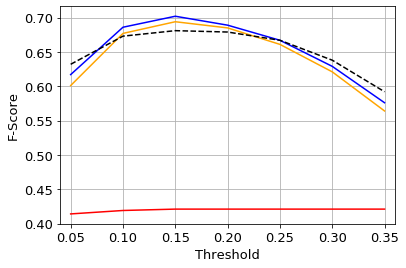

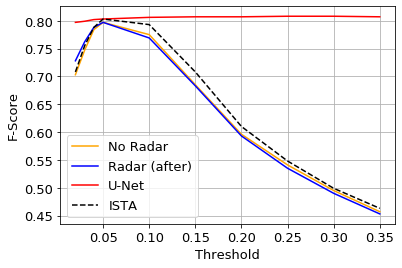

In [72]:
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_side/eval/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/after/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/unet/len30/train_side/eval/CSL_lobby_700_train/f-score.txt'
                    ]               
results_file_titles = ['No Radar','Radar (after)','U-Net']

for ii in range(3):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_700_30,thresholds)
plt.xlim([.04,.36])
# plt.legend()
plt.grid()
plt.savefig('test_seq_f_score_general_8_layers.png',bbox_inches='tight')



plt.figure()
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_side/eval/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/after/CSL_lobby_side_0/f-score.txt',
                    '/home/spencer/research/radar-rgb-bfs/NN/runs/unet/len30/train_side/eval/CSL_lobby_side_0_train/f-score.txt']               

for ii in range(3):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_side_30,thresholds)
plt.legend()
plt.grid()
plt.savefig('train_seq_f_score_general_8_layers.png',bbox_inches='tight')
plt.show()

# PAPER (appendix) 8 Layers Train(700) Len(30)

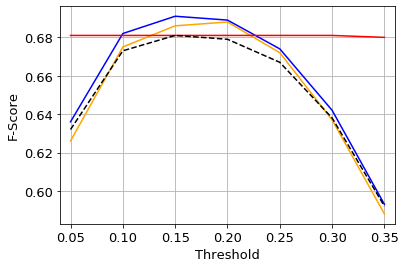

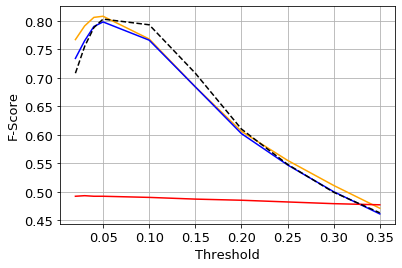

In [73]:
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_lobby_700/eval/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/after/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/unet/len30/train_lobby_700/thresh15/eval/CSL_lobby_700_train/f-score.txt'
                    ]               
results_file_titles = ['No Radar','Radar (after)','U-Net']

for ii in range(3):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_700_30,thresholds)
plt.xlim([.04,.36])
# plt.legend()
plt.grid()
plt.savefig('train_seq_f_score_general_8_layers_train_700.png',bbox_inches='tight')



plt.figure()
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/baseline/len30/train_lobby_700/eval/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_lobby_700/eval/after/CSL_lobby_side_0/f-score.txt',
                    '/home/spencer/research/radar-rgb-bfs/NN/runs/unet/len30/train_lobby_700/thresh15/eval/CSL_lobby_side_0_train/f-score.txt']               

for ii in range(3):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plot_ista_gt(csl_lobby_side_30,thresholds)
# plt.legend()
plt.grid()
plt.savefig('test_seq_f_score_general_8_layers_train_700.png',bbox_inches='tight')
plt.show()

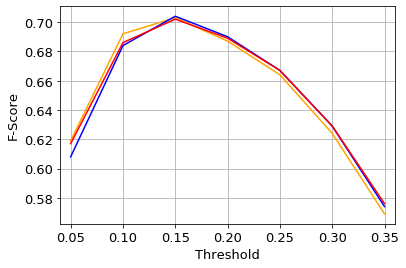

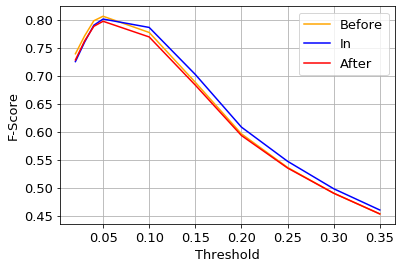

In [74]:
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/before/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/in/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/after/CSL_lobby_700/f-score.txt',
                    ]               
results_file_titles = ['Before','In','After']

for ii in range(3):
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
# plot_ista_gt(csl_lobby_700_30,thresholds)
# plt.legend()
plt.grid()
plt.xlim([.04,.36])
plt.savefig('test_seq_f_score_radar_8_layers.png',bbox_inches='tight')



plt.figure()
results_file_list = [ '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/before/CSL_lobby_side_0/f-score.txt',
                    '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/in/CSL_lobby_side_0/f-score.txt',
                    '/home/spencer/research/radar-rgb-bfs/NN/runs/8_layers/radar/len30/train_side/eval/after/CSL_lobby_side_0/f-score.txt',
]               

for ii in range(3):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plt.legend()
plt.grid()
plt.savefig('train_seq_f_score_radar_8_layers.png',bbox_inches='tight')
plt.show()